<a href="https://colab.research.google.com/github/yelosolutions/Machine-Learning/blob/main/Insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependancies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data collection 

In [2]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [5]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Categorical features - 'sex','smoker','region'

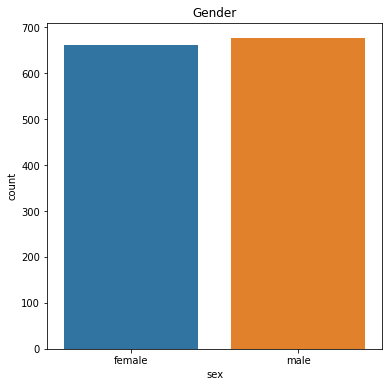

In [8]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = insurance_dataset)
plt.title('Gender')
plt.show()

In [9]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

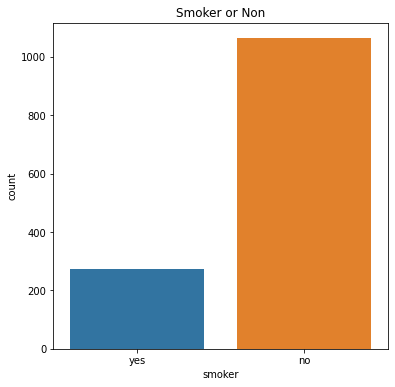

In [10]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = insurance_dataset)
plt.title('Smoker or Non')
plt.show()

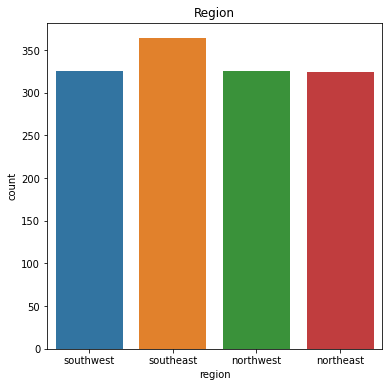

In [11]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = insurance_dataset)
plt.title('Region')
plt.show()

Value features-age,bmi,children and charges

Distribution plot of age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


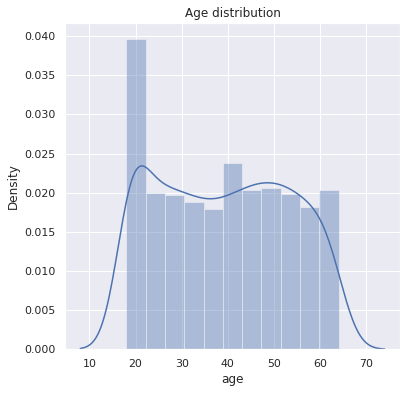

In [15]:
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

BMI Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


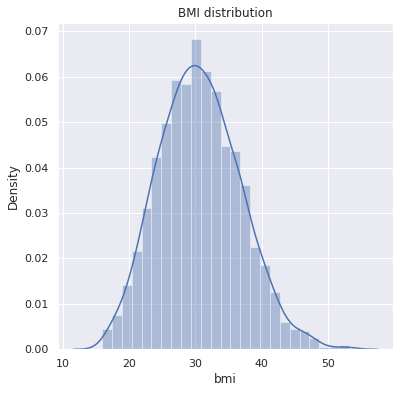

In [16]:
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()

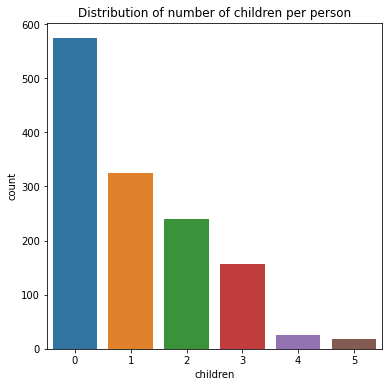

In [13]:
plt.figure(figsize = (6,6))
sns.countplot(x= 'children' , data = insurance_dataset)
plt.title('Distribution of number of children per person')
plt.show()

Data processing - encoding

In [47]:
insurance_dataset.replace({'sex' : {'male': 0 , 'female' : 1}}, inplace = True)
insurance_dataset.replace({'smoker' : {'yes': 0 , 'no' : 1}}, inplace = True)
insurance_dataset.replace({'region' : {'southwest': 0 , 'southeast' : 1, 'northwest': 2 , 'northeast': 3 }})

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


In [48]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


Separating target from features

In [49]:
X = insurance_dataset.drop(columns = 'charges', axis = 1)

In [50]:
Y =  insurance_dataset['charges']

In [51]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [52]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Train and test splitting

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2 , random_state = 2)

In [54]:
print(X.shape, X_train.shape, X_test.shape )

(1338, 6) (1070, 6) (268, 6)


Model_trainig

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_train, Y_train)

LinearRegression()

In [57]:
training_data_prediction = model.predict(X_train)

R Squared value determination

In [58]:
R2_score = metrics.r2_score(Y_train, training_data_prediction)
print('R_squared value:', R2_score)

R_squared value: 0.7519923667088932


Creating a predictive system

In [68]:
input_data = ('25,0 ,33.66,4,1 ,1')

In [69]:
input_data_as_numpy_array = np.asarray(input_data)

In [70]:
input_data_reshaped  = input_data_as_numpy_array.reshape(1,-1)

In [71]:
prediction = model.predict(input_data_reshaped)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


ValueError: ignored

In [63]:
print(prediction)

NameError: ignored